In [1]:
import torchvision
import numpy as np
from Classes.NeuralNetwork import NeuralNetwork
import Viz.Plots as plot

# Aufgabe 1

In [2]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Train Dataset

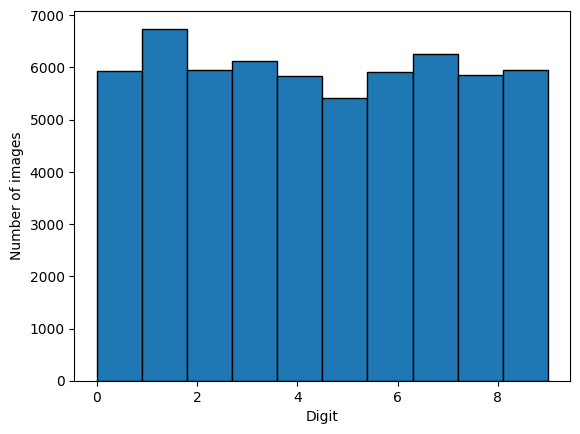

In [3]:
plot.show_hist(train_labels)

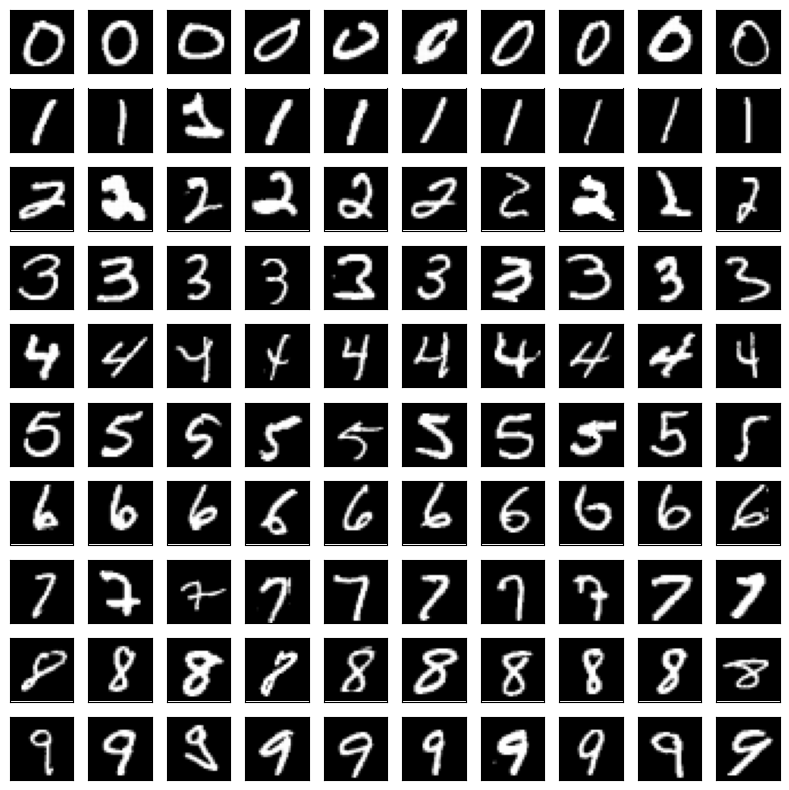

In [4]:
plot.show_image_matrix(train_images, train_labels)

## Test Dataset

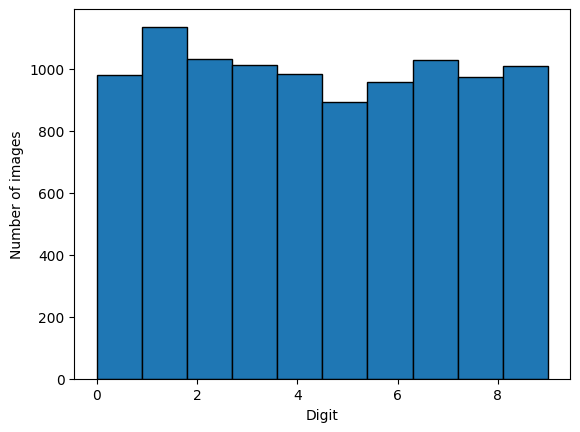

In [5]:
plot.show_hist(test_labels)

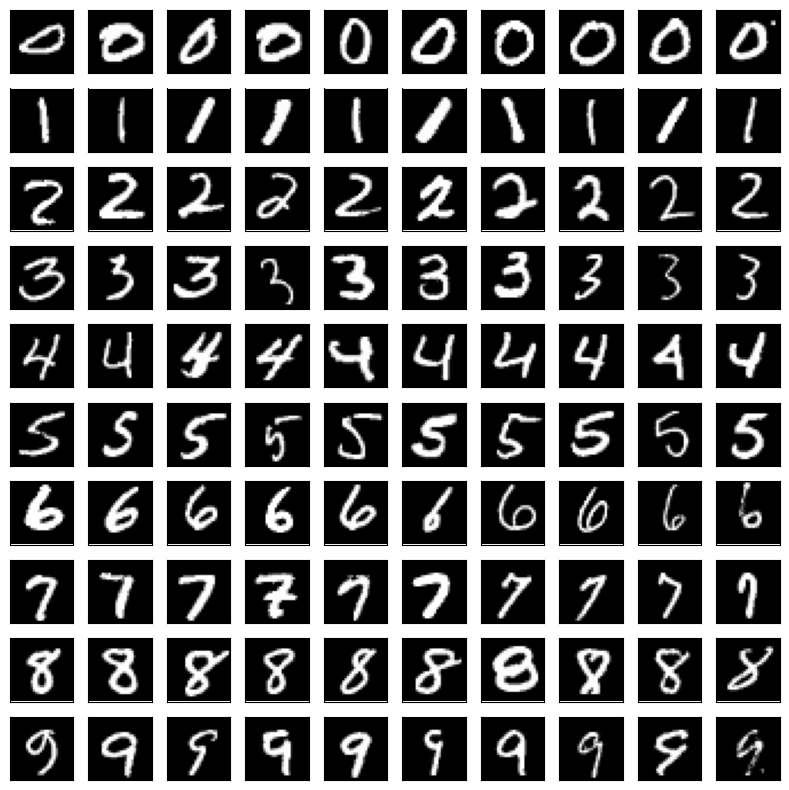

In [6]:
plot.show_image_matrix(test_images, test_labels)

# Aufgabe 2

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` testet den Backward-Pass, bei dem die Gradienten in Bezug auf die Eingabe und Parameter berechnet werden.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`
- Ausgabegradient (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt der transponierten Eingabedaten und des Ausgabegradienten berechnet:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix}^T \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Nach der Korrektur und Neuberechnung:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 2.6 & 3.8 \\ 3.0 & 4.4 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` ist die Summe des Ausgabegradienten entlang der ersten Achse (Summierung der Zeilen):

$$
\text{expected\_bias\_gradient} = \sum \text{output\_gradient} \text{ (axis=0)}
$$

$$
\text{expected\_bias\_gradient} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.


# Aufgabe 3

In [7]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
binary_train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
binary_test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784)
binary_train_images = train_images.reshape(train_images.shape[0], -1)
binary_test_images = test_images.reshape(test_images.shape[0], -1)

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion (Evaluation Function)

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
Eine Alternative zur binären Kreuzentropie ist der Mean Squared Error (MSE), der jedoch weniger geeignet für Klassifikationsprobleme ist, da die Interpretation der Outputs als Wahrscheinlichkeiten nicht direkt berücksichtigt wird. MSE ist auch empfindlicher gegenüber Ausreißern, was zu einem langsameren Konvergenzverhalten führen kann.

Als alternative Evaluationsfunktion könnten Metriken wie Precision, Recall und F1-Score betrachtet werden, besonders wenn der Datensatz unausgeglichen ist. Diese Metriken geben einen detaillierteren Einblick in die Leistung des Klassifikators, was in manchen Anwendungsfällen vorteilhaft sein kann.

In [8]:
import Train_Models.Binary_Train as bt

In [9]:
input_dim = 784  # 28*28
hidden_dim = 128
output_dim = 1
hidden_layers = 1
learning_rate = 0.01

model = NeuralNetwork(input_dim, hidden_dim, output_dim, hidden_layers, learning_rate)

In [10]:
epochs = 20
patience = 1
batch_size = 64

train_losses, test_losses, train_accuracies, test_accuracies = bt.binary_train_model(
    model, binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, patience, batch_size
)

Epoch 1, Train Loss: 0.10522222674477452, Test Loss: 0.09960976945130857, Train Accuracy: 0.9694, Test Accuracy: 0.9722
Epoch 2, Train Loss: 0.0978693119445048, Test Loss: 0.09208974852553624, Train Accuracy: 0.9713333333333334, Test Accuracy: 0.9721
Epoch 3, Train Loss: 0.09455308253654177, Test Loss: 0.08930650202066054, Train Accuracy: 0.9702, Test Accuracy: 0.9733
Epoch 4, Train Loss: 0.09761069135379286, Test Loss: 0.09196970658615644, Train Accuracy: 0.9705166666666667, Test Accuracy: 0.9722
Stopping early due to lack of improvement in test loss at epoch 4.


## Aufgabe 4

In [11]:
epochs = 20
patience = 5
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
binary_evaluation_results = bt.binary_evaluate_combinations(
    binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, patience, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 0.12999973652633712, Test Loss: 0.12610639658576803, Train Accuracy: 0.96375, Test Accuracy: 0.9642
Epoch 2, Train Loss: 0.13489079091005846, Test Loss: 0.12918984564397393, Train Accuracy: 0.9600833333333333, Test Accuracy: 0.9608
Epoch 3, Train Loss: 0.13917317657118192, Test Loss: 0.13452373206182847, Train Accuracy: 0.9585666666666667, Test Accuracy: 0.9595
Epoch 4, Train Loss: 0.14204703970048316, Test Loss: 0.13768827074420706, Train Accuracy: 0.9586, Test Accuracy: 0.9596
Epoch 5, Train Loss: 0.14431604848423854, Test Loss: 0.14015543649664447, Train Accuracy: 0.95935, Test Accuracy: 0.9603
Epoch 6, Train Loss: 0.14531515232590705, Test Loss: 0.1416223434498221, Train Accuracy: 0.95845, Test Accuracy: 0.9592
Stopping early due to lack of improvement in test loss at epoch 6.
Completed training for learning rate 0.01 and hidden layer size 4

Evaluating model with learning rate 0.01 and hidden lay

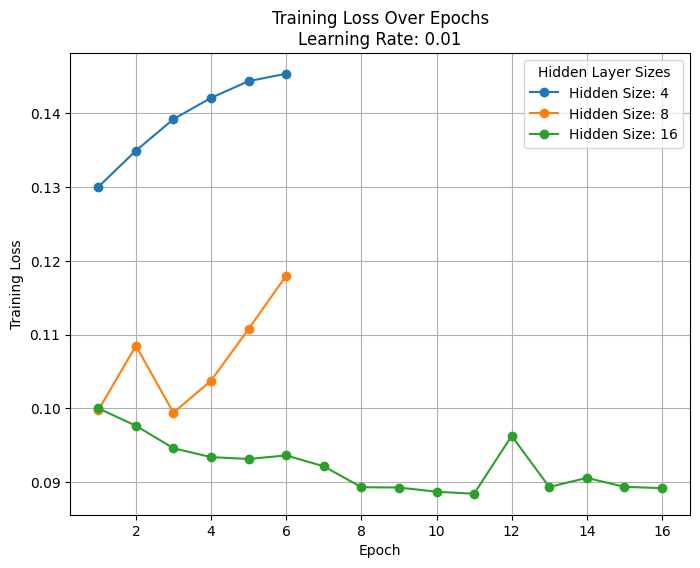

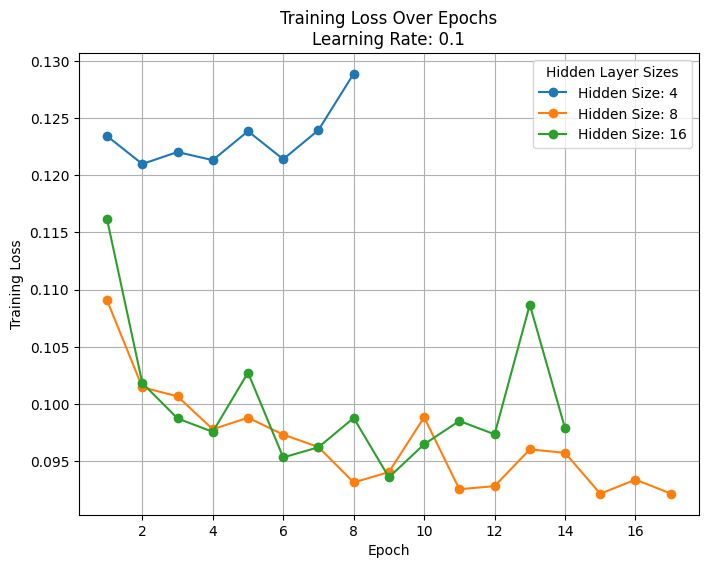

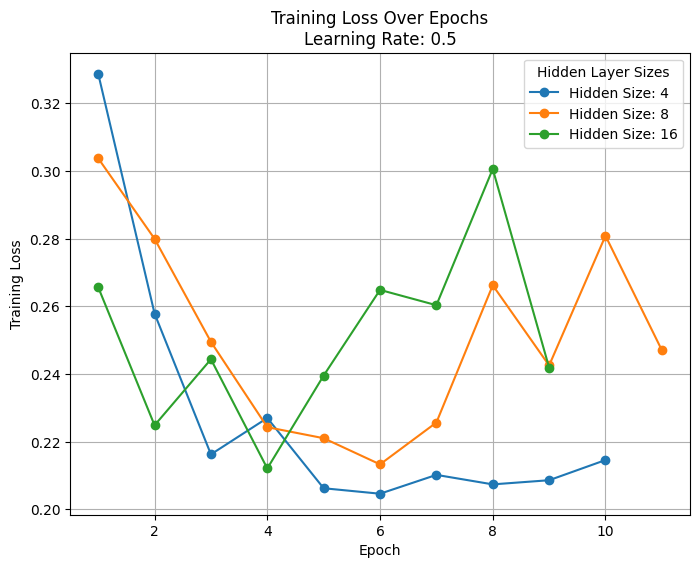

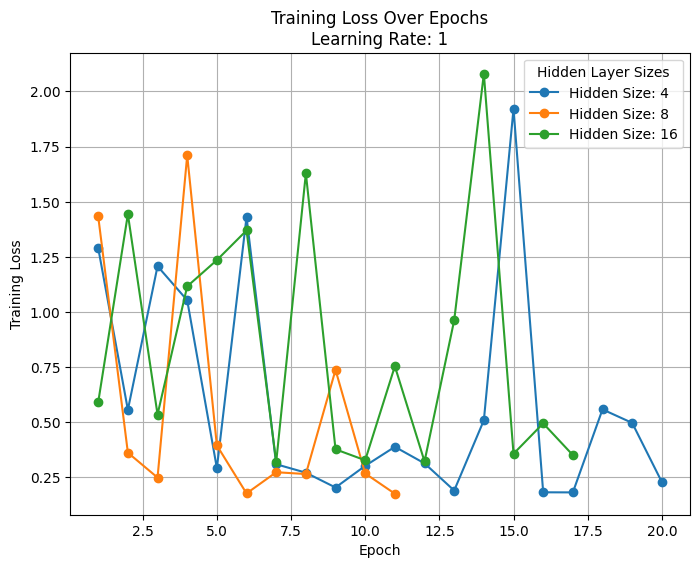

In [12]:
plot.show_evaluation_results(binary_evaluation_results)

## Aufgabe 5

In [13]:
import Train_Models.Categorial_Train as ct

In [14]:
def one_hot_encode(labels, num_classes=10):
    # Create an array of zeros with shape (len(labels), num_classes)
    one_hot = np.zeros((labels.shape[0], num_classes))
    # Set the appropriate elements to one
    one_hot[np.arange(labels.shape[0]), labels] = 1
    return one_hot

In [15]:
categorical_train_labels = one_hot_encode(train_labels)
categorical_test_labels = one_hot_encode(test_labels)

# Flatten the images for simplicity (28x28 to 784)
categorical_train_images = train_images.reshape(train_images.shape[0], -1)
categorical_test_images = test_images.reshape(test_images.shape[0], -1)

In [16]:
epochs = 20
patience = 5
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
categorical_evaluation_results = ct.categorical_evaluate_combinations(
    categorical_train_images, categorical_train_labels, categorical_test_images, categorical_test_labels, epochs, patience, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 2.181163153443231, Test Loss: 2.1773836232933714, Train Accuracy: 0.21, Test Accuracy: 0.2112
Epoch 2, Train Loss: 2.18374260338509, Test Loss: 2.1817860868043, Train Accuracy: 0.20996666666666666, Test Accuracy: 0.2111
Epoch 3, Train Loss: 2.1853405759138433, Test Loss: 2.1835399203861385, Train Accuracy: 0.21006666666666668, Test Accuracy: 0.2111
Epoch 4, Train Loss: 2.186594324436886, Test Loss: 2.184354818773473, Train Accuracy: 0.21001666666666666, Test Accuracy: 0.2112
Epoch 5, Train Loss: 2.1851872520953326, Test Loss: 2.1832093334800984, Train Accuracy: 0.20995, Test Accuracy: 0.2111
Epoch 6, Train Loss: 2.1861466064788946, Test Loss: 2.1839784629997623, Train Accuracy: 0.20998333333333333, Test Accuracy: 0.2111
Stopping early due to lack of improvement in test loss at epoch 6.
Completed training for learning rate 0.01 and hidden layer size 4

Evaluating model with learning rate 0.01 and hidde

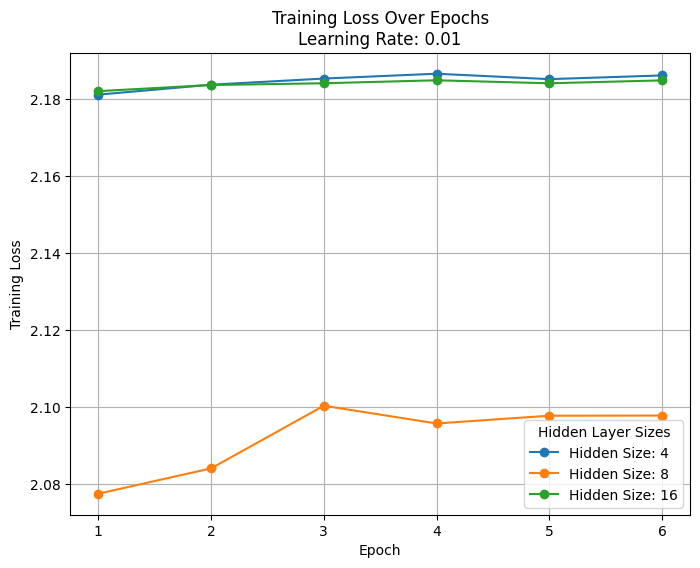

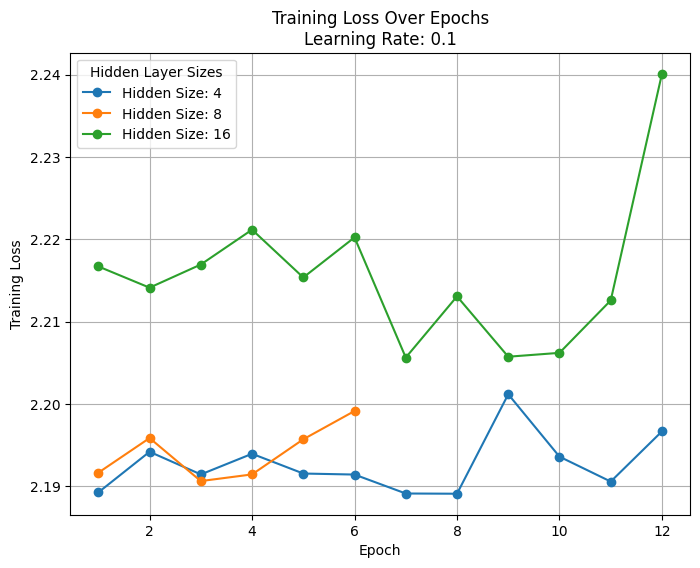

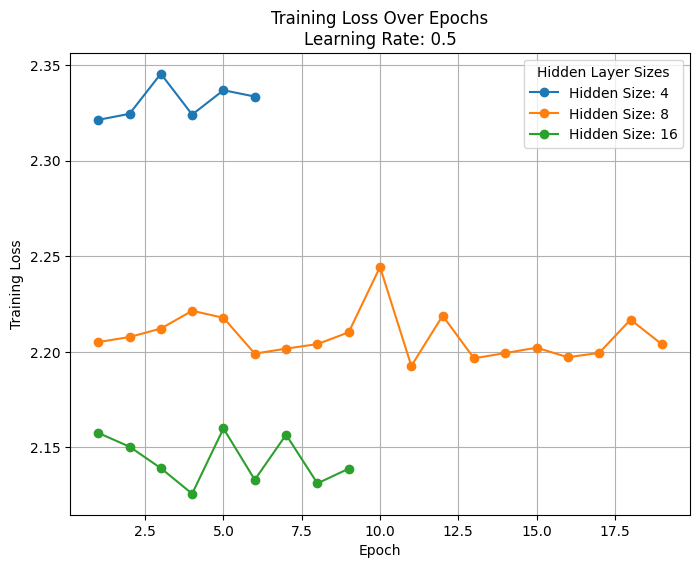

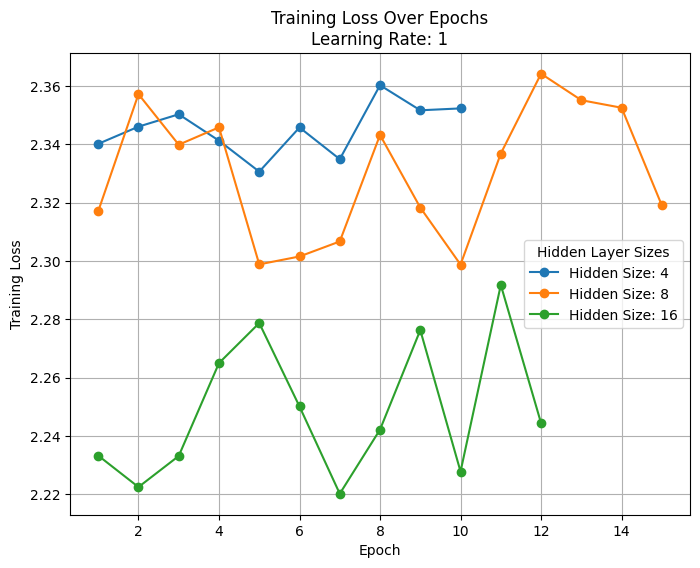

In [17]:
plot.show_evaluation_results(categorical_evaluation_results)